In [1]:
import numpy as np
import ray # for multiprocesing
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy
from cgi_phasec_poppy import imshows
from cgi_phasec_poppy.math_module import xp

import misc_funs as misc

npix = 310

iwa = 2.8
owa = 9.7

Propagating wavelength 575.000 nm.
PSF calculated in 0.281s


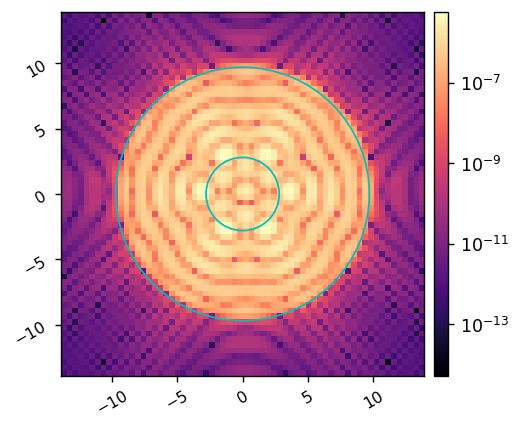

In [19]:
reload(cgi_phasec_poppy)
reload(cgi_phasec_poppy.cgi_dev)
reload(cgi_phasec_poppy.hlc_dev)
mode = cgi_phasec_poppy.CGIDEV(cgi_mode='hlc', 
               use_pupil_defocus=True, 
               use_opds=False,
               polaxis=0)

wfs = mode.calc_wfs()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshows.imshow1(wfs[-1].intensity, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)